In [1]:
import os
# while not os.path.exists("./bridge_net"):
#     %cd ..

In [2]:
import numpy as np

import yaml

from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [8]:
type1_rel_acc = {
    "tin200": {
        "de": [
            (1.000, (91.30, 0.10)),
            (2.000, (92.72, 0.13)),
            (3.000, (93.06, 0.14)),
            (4.000, (93.51, 0.19)),
            (5.000, (93.61, 0.11)),
            (7.000, (93.84, 0.06)),
            (9.000, (94.00, 0.00)),
        ],
        "bridge": [
            (1.000, (91.30, 0.10)),
            (3.000, (91.91, 0.04)),
            (5.000, (91.94, 0.03)),
            (7.000, (91.99, 0.06)),
        ],
        "dbn": [
            (1.000, (91.30, 0.10)),
            (3.000, (92.98, 0.16)),
            (5.000, (93.23, 0.07)),
        ],
    },
    "in1k": {
        "de": [
            (1.000, (91.30, 0.10)),
            (2.000, (92.72, 0.13)),
            (3.000, (93.06, 0.14)),
            (4.000, (93.51, 0.19)),
            (5.000, (93.61, 0.11)),
            (7.000, (93.84, 0.06)),
            (9.000, (94.00, 0.00)),
        ],
        "bridge": [
            (1.000, (91.30, 0.10)),
            (1.411, (91.91, 0.04)),
            (1.822, (91.94, 0.03)),
            (2.233, (91.99, 0.06)),
        ],
        "dbn": [
            (1.000, (91.30, 0.10)),
            (1.166, (92.98, 0.16)),
            (1.332, (93.23, 0.07)),
        ],
    },
}


In [9]:
type1_rel_nll = {
    "tin200": {
        "de": [
            (1.000, (1.683, 0.009)),
            (2.000, (1.499, 0.007)),
        ],
        "bridge": [
            (1.050, (1.478, 0.006)),
            (1.099, (1.421, 0.004)),
            (1.149, (1.395, 0.003)),
            # (1.198, (1.380, 0.001)),
        ],
        "dbn": [
            (1.180, (1.446, 0.002)),
            (1.359, (1.388, 0.004)),
            (1.539, (1.362, 0.003)),
            (1.719, (1.347, 0.002)),
        ],
    },
    "in1k": {
        "de": [
            (1.000, (0.936, 0.003)),
            (2.000, (0.883, 0.001)),
        ],
        "bridge": [
            (1.061, (0.914, 0.000)),
            (1.123, (0.907, 0.000)),
            (1.184, (0.905, 0.000)),
            # (1.245, (0.904, 0.000)),
        ],
        "dbn": [
            (1.194, (0.889, 0.001)),
            (1.389, (0.876, 0.001)),
            (1.583, (0.870, 0.000)),
            (1.778, (0.867, 0.000)),
        ],
    },
}


In [10]:
type1_rel_ece = {
    "tin200": {
        "de": [
            (1.000, (1.000, 0.000)),
            (2.000, (2.000, 0.000)),
            (3.000, (3.000, 0.000)),
            (4.000, (4.000, 0.000)),
            (5.000, (5.000, 0.000)),
            (6.000, (6.000, 0.000)),
            (7.000, (7.000, 0.000)),
            (8.000, (8.000, 0.000)),
            (9.000, (9.000, 0.000)),
        ],
        "bridge": [
            (1.000, (1.000, 0.000)),
            (3.000, (1.899, 0.000)),
            (5.000, (1.945, 0.000)),
            (7.000, (1.940, 0.000)),
        ],
        "dbn": [
            (1.000, (1.000, 0.000)),
            (3.000, (2.363, 0.000)),
            (5.000, (3.031, 0.000)),
        ],
    },
    "in1k": {
        "de": [
            (1.000, (1.000, 0.000)),
            (2.000, (2.000, 0.000)),
            (3.000, (3.000, 0.000)),
            (4.000, (4.000, 0.000)),
            (5.000, (5.000, 0.000)),
            (6.000, (6.000, 0.000)),
            (7.000, (7.000, 0.000)),
            (8.000, (8.000, 0.000)),
            (9.000, (9.000, 0.000)),
        ],
        "bridge": [
            (1.000, (1.000, 0.000)),
            (1.411, (1.899, 0.000)),
            (1.822, (1.945, 0.000)),
            (2.233, (1.940, 0.000)),
        ],
        "dbn": [
            (1.000, (1.000, 0.000)),
            (1.166, (2.363, 0.000)),
            (1.332, (3.031, 0.000)),
        ],
    },
}


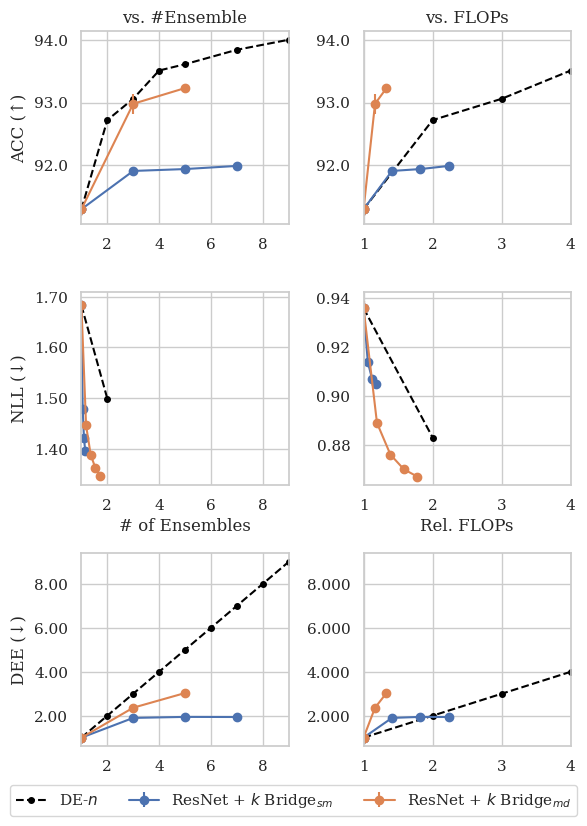

In [11]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(6, 8), squeeze=False)

c1 = sns.color_palette("deep")[0]
c2 = sns.color_palette("deep")[1]

ax[0, 0].set_title("vs. #Ensemble")
ax[0, 1].set_title("vs. FLOPs")

ax[1, 0].set_xlabel("# of Ensembles")
ax[1, 1].set_xlabel("Rel. FLOPs")

ax[0, 0].set_ylabel("ACC (↑)")
ax[1, 0].set_ylabel("NLL (↓)")
ax[2, 0].set_ylabel("DEE (↓)")

ax[0, 0].set_xlim(1., 9.)
ax[1, 0].set_xlim(1., 9.)
ax[2, 0].set_xlim(1., 9.)
ax[0, 1].set_xlim(1., 4.)
ax[1, 1].set_xlim(1., 4.)
ax[2, 1].set_xlim(1., 4.)

ax[0, 0].xaxis.set_major_formatter(FormatStrFormatter("%g"))
ax[1, 0].xaxis.set_major_formatter(FormatStrFormatter("%g"))
ax[2, 0].xaxis.set_major_formatter(FormatStrFormatter("%g"))
ax[0, 1].xaxis.set_major_formatter(FormatStrFormatter("%g"))
ax[1, 1].xaxis.set_major_formatter(FormatStrFormatter("%g"))
ax[2, 1].xaxis.set_major_formatter(FormatStrFormatter("%g"))

ax[0, 0].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax[1, 0].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax[2, 0].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax[0, 1].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax[1, 1].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax[2, 1].yaxis.set_major_formatter(FormatStrFormatter("%.3f"))


ax[0, 0].plot(
    [v[0]    for v in type1_rel_acc["tin200"]["de"]],
    [v[1][0] for v in type1_rel_acc["tin200"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)
ax[1, 0].plot(
    [v[0]    for v in type1_rel_nll["tin200"]["de"]],
    [v[1][0] for v in type1_rel_nll["tin200"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)
ax[2, 0].plot(
    [v[0]    for v in type1_rel_ece["tin200"]["de"]],
    [v[1][0] for v in type1_rel_ece["tin200"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)

ax[0, 0].errorbar(
    [type1_rel_acc["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["tin200"]["bridge"]],
    [type1_rel_acc["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["tin200"]["bridge"]],
    [type1_rel_acc["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["tin200"]["bridge"]],
    label="ResNet + $k$ Bridge$_{sm}$", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[0, 0].errorbar(
    [type1_rel_acc["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["tin200"]["dbn"]],
    [type1_rel_acc["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["tin200"]["dbn"]],
    [type1_rel_acc["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["tin200"]["dbn"]],
    label="ResNet + $k$ Bridge$_{md}$", color=c2, linestyle="-",  marker=".", markersize=12,
)

ax[1, 0].errorbar(
    [type1_rel_nll["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_nll["tin200"]["bridge"]],
    [type1_rel_nll["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_nll["tin200"]["bridge"]],
    [type1_rel_nll["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_nll["tin200"]["bridge"]],
    label="ResNet + $k$ Bridge$_{sm}$", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[1, 0].errorbar(
    [type1_rel_nll["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_nll["tin200"]["dbn"]],
    [type1_rel_nll["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_nll["tin200"]["dbn"]],
    [type1_rel_nll["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_nll["tin200"]["dbn"]],
    label="ResNet + $k$ Bridge$_{md}$", color=c2, linestyle="-",  marker=".", markersize=12,
)

ax[2, 0].errorbar(
    [type1_rel_ece["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["tin200"]["bridge"]],
    [type1_rel_ece["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["tin200"]["bridge"]],
    [type1_rel_ece["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["tin200"]["bridge"]],
    label="ResNet + $k$ Bridge$_{sm}$", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[2, 0].errorbar(
    [type1_rel_ece["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["tin200"]["dbn"]],
    [type1_rel_ece["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["tin200"]["dbn"]],
    [type1_rel_ece["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["tin200"]["dbn"]],
    label="ResNet + $k$ Bridge$_{md}$", color=c2, linestyle="-",  marker=".", markersize=12,
)


ax[0, 1].plot(
    [v[0]    for v in type1_rel_acc["in1k"]["de"]],
    [v[1][0] for v in type1_rel_acc["in1k"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)
ax[1, 1].plot(
    [v[0]    for v in type1_rel_nll["in1k"]["de"]],
    [v[1][0] for v in type1_rel_nll["in1k"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)
ax[2, 1].plot(
    [v[0]    for v in type1_rel_ece["in1k"]["de"]],
    [v[1][0] for v in type1_rel_ece["in1k"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)

ax[0, 1].errorbar(
    [type1_rel_acc["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["in1k"]["bridge"]],
    [type1_rel_acc["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["in1k"]["bridge"]],
    [type1_rel_acc["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["in1k"]["bridge"]],
    label="ResNet + $k$ BNs", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[0, 1].errorbar(
    [type1_rel_acc["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["in1k"]["dbn"]],
    [type1_rel_acc["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["in1k"]["dbn"]],
    [type1_rel_acc["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["in1k"]["dbn"]],
    label="ResNet + $k$ DBNs", color=c2, linestyle="-",  marker=".", markersize=12,
)

ax[1, 1].errorbar(
    [type1_rel_nll["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_nll["in1k"]["bridge"]],
    [type1_rel_nll["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_nll["in1k"]["bridge"]],
    [type1_rel_nll["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_nll["in1k"]["bridge"]],
    label="ResNet + $k$ BNs", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[1, 1].errorbar(
    [type1_rel_nll["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_nll["in1k"]["dbn"]],
    [type1_rel_nll["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_nll["in1k"]["dbn"]],
    [type1_rel_nll["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_nll["in1k"]["dbn"]],
    label="ResNet + $k$ DBNs", color=c2, linestyle="-",  marker=".", markersize=12,
)

ax[2, 1].errorbar(
    [type1_rel_ece["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["in1k"]["bridge"]],
    [type1_rel_ece["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["in1k"]["bridge"]],
    [type1_rel_ece["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["in1k"]["bridge"]],
    label="ResNet + $k$ BNs", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[2, 1].errorbar(
    [type1_rel_ece["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["in1k"]["dbn"]],
    [type1_rel_ece["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["in1k"]["dbn"]],
    [type1_rel_ece["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["in1k"]["dbn"]],
    label="ResNet + $k$ DBNs", color=c2, linestyle="-",  marker=".", markersize=12,
)

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.04))
# fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.12))
fig.tight_layout()
fig.show()
fig.savefig("figures/type1_t200.pdf", bbox_inches="tight")

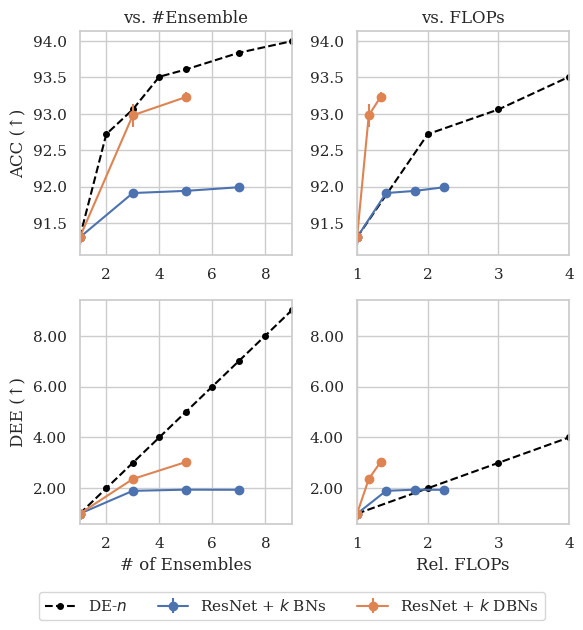

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6, 6), squeeze=False)

c1 = sns.color_palette("deep")[0]
c2 = sns.color_palette("deep")[1]

ax[0, 0].set_title("vs. #Ensemble")
ax[0, 1].set_title("vs. Rel. FLOPs")

ax[1, 0].set_xlabel("# of Ensembles")
ax[1, 1].set_xlabel("Rel. FLOPs")

ax[0, 0].set_ylabel("ACC (↑)")
ax[1, 0].set_ylabel("DEE (↑)")

ax[0, 0].set_xlim(1., 9.)
ax[1, 0].set_xlim(1., 9.)
ax[0, 1].set_xlim(1., 4.)
ax[1, 1].set_xlim(1., 4.)

ax[0, 0].xaxis.set_major_formatter(FormatStrFormatter("%g"))
ax[1, 0].xaxis.set_major_formatter(FormatStrFormatter("%g"))
ax[0, 1].xaxis.set_major_formatter(FormatStrFormatter("%g"))
ax[1, 1].xaxis.set_major_formatter(FormatStrFormatter("%g"))

ax[0, 0].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax[1, 0].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
ax[0, 1].yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax[1, 1].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))


ax[0, 0].plot(
    [v[0]    for v in type1_rel_acc["tin200"]["de"]],
    [v[1][0] for v in type1_rel_acc["tin200"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)
ax[1, 0].plot(
    [v[0]    for v in type1_rel_ece["tin200"]["de"]],
    [v[1][0] for v in type1_rel_ece["tin200"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)

ax[0, 0].errorbar(
    [type1_rel_acc["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["tin200"]["bridge"]],
    [type1_rel_acc["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["tin200"]["bridge"]],
    [type1_rel_acc["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["tin200"]["bridge"]],
    label="ResNet + $k$ BNs", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[0, 0].errorbar(
    [type1_rel_acc["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["tin200"]["dbn"]],
    [type1_rel_acc["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["tin200"]["dbn"]],
    [type1_rel_acc["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["tin200"]["dbn"]],
    label="ResNet + $k$ DBNs", color=c2, linestyle="-",  marker=".", markersize=12,
)

ax[1, 0].errorbar(
    [type1_rel_ece["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["tin200"]["bridge"]],
    [type1_rel_ece["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["tin200"]["bridge"]],
    [type1_rel_ece["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["tin200"]["bridge"]],
    label="ResNet + $k$ BNs", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[1, 0].errorbar(
    [type1_rel_ece["tin200"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["tin200"]["dbn"]],
    [type1_rel_ece["tin200"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["tin200"]["dbn"]],
    [type1_rel_ece["tin200"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["tin200"]["dbn"]],
    label="ResNet + $k$ DBNs", color=c2, linestyle="-",  marker=".", markersize=12,
)


ax[0, 1].plot(
    [v[0]    for v in type1_rel_acc["in1k"]["de"]],
    [v[1][0] for v in type1_rel_acc["in1k"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)
ax[1, 1].plot(
    [v[0]    for v in type1_rel_ece["in1k"]["de"]],
    [v[1][0] for v in type1_rel_ece["in1k"]["de"]],
    label="DE-$n$", color="black", linestyle="--", marker="o", markersize=4,
)

ax[0, 1].errorbar(
    [type1_rel_acc["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["in1k"]["bridge"]],
    [type1_rel_acc["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["in1k"]["bridge"]],
    [type1_rel_acc["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["in1k"]["bridge"]],
    label="ResNet + $k$ BNs", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[0, 1].errorbar(
    [type1_rel_acc["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_acc["in1k"]["dbn"]],
    [type1_rel_acc["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_acc["in1k"]["dbn"]],
    [type1_rel_acc["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_acc["in1k"]["dbn"]],
    label="ResNet + $k$ DBNs", color=c2, linestyle="-",  marker=".", markersize=12,
)

ax[1, 1].errorbar(
    [type1_rel_ece["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["in1k"]["bridge"]],
    [type1_rel_ece["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["in1k"]["bridge"]],
    [type1_rel_ece["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["in1k"]["bridge"]],
    label="ResNet + $k$ BNs", color=c1, linestyle="-",  marker=".", markersize=12,
)
ax[1, 1].errorbar(
    [type1_rel_ece["in1k"]["de"][0][0]   ] + [v[0]    for v in type1_rel_ece["in1k"]["dbn"]],
    [type1_rel_ece["in1k"]["de"][0][1][0]] + [v[1][0] for v in type1_rel_ece["in1k"]["dbn"]],
    [type1_rel_ece["in1k"]["de"][0][1][1]] + [v[1][1] for v in type1_rel_ece["in1k"]["dbn"]],
    label="ResNet + $k$ DBNs", color=c2, linestyle="-",  marker=".", markersize=12,
)

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.06))
fig.tight_layout()
fig.show()
fig.savefig("figures/dee.pdf", bbox_inches="tight")